In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df['children'] = df['children'].fillna(0)

In [4]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [5]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [6]:
df["is_family"] = df.apply(family, axis = 1)
df["total_customer"] = df["adults"] + df["children"] + df["babies"]

In [7]:
df = df.drop(columns = ['adults', 'babies', 'children', 'reservation_status_date', 'reservation_status', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'])

In [8]:
#drop null rows for column "Country"

df.dropna(subset=['country'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_month              118902 non-null  int64  
 4   stays_in_weekend_nights         118902 non-null  int64  
 5   stays_in_week_nights            118902 non-null  int64  
 6   meal                            118902 non-null  object 
 7   country                         118902 non-null  object 
 8   market_segment                  118902 non-null  object 
 9   distribution_channel            118902 non-null  object 
 10  is_repeated_guest               118902 non-null  int64  
 11  previous_cancellations          118902 non-null  int64  
 12  previous_booking

In [10]:
#columns to encode

# to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type', "arrival_date_month"]
to_encode = ["meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]

for column in df.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(df[column].astype(str))
        df[column]=le.transform(df[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_month              118902 non-null  int64  
 4   stays_in_weekend_nights         118902 non-null  int64  
 5   stays_in_week_nights            118902 non-null  int64  
 6   meal                            118902 non-null  int32  
 7   country                         118902 non-null  int32  
 8   market_segment                  118902 non-null  int32  
 9   distribution_channel            118902 non-null  int32  
 10  is_repeated_guest               118902 non-null  int64  
 11  previous_cancellations          118902 non-null  int64  
 12  previous_booking

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer
0,0,0,342,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
1,0,0,737,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
2,0,0,7,7,0,1,0,59,3,1,...,0,NaN,NaN,0,2,75.0,0,0,0,1.0
3,0,0,13,7,0,1,0,59,2,0,...,0,304.0,NaN,0,2,75.0,0,0,0,1.0
4,0,0,14,7,0,2,0,59,6,3,...,0,240.0,NaN,0,2,98.0,0,1,0,2.0


In [13]:
#encoding both agent and company code

df['agent_encoded'] = df['agent'].notnull()
df['company_encoded'] = df['company'].notnull()
df["agent_encoded"] = df["agent_encoded"].astype(int)
df["company_encoded"] = df["company_encoded"].astype(int)
df=df.drop(['agent','company'],axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_month              118902 non-null  int64  
 4   stays_in_weekend_nights         118902 non-null  int64  
 5   stays_in_week_nights            118902 non-null  int64  
 6   meal                            118902 non-null  int32  
 7   country                         118902 non-null  int32  
 8   market_segment                  118902 non-null  int32  
 9   distribution_channel            118902 non-null  int32  
 10  is_repeated_guest               118902 non-null  int64  
 11  previous_cancellations          118902 non-null  int64  
 12  previous_booking

In [15]:
column_list=list(df.columns)
column_list.remove('is_canceled')

In [16]:
# features
X = df[column_list]

# target
y = df['is_canceled']

In [17]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

## Basic Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

params = {
        'criterion': ['entropy', 'gini'],
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 15, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 5]
        }

model = RandomForestClassifier()
search = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)
search.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, None],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [20]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

model = RandomForestClassifier(criterion = "entropy", max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
y_pred_prob = model.predict_proba(X_test)[:,1]
print("AUROC: %.3f%%" % (roc_auc_score(y_test, y_pred_prob) * 100.0))

Accuracy: 88.73%
Precision: 87.65%
Recall: 81.24%
F1: 84.33%
AUROC: 95.493%


Text(0.5, 0, 'Permutation Importance')

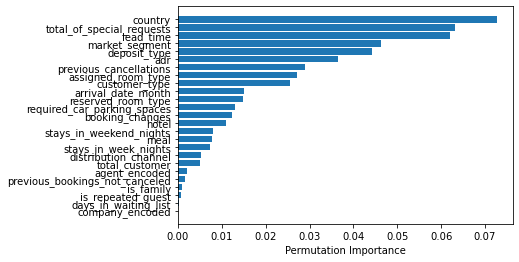

In [46]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

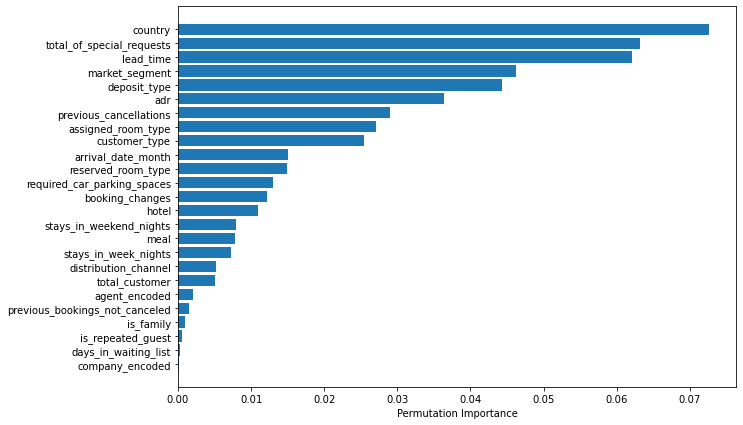

In [47]:
plt.figure(figsize=(10,7))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Random Forest with Scaling

In [33]:
# create copy of DF for scaling
X_scaled = X.copy()

In [34]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']

remaining_columns = [x for x in X_scaled.columns if x not in columns_to_scale]


# Scale columns
scaler = StandardScaler()

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale]) # to learn mean and standard dev to be used for scaling


In [35]:
# Train Test Split with Scaling
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

In [36]:
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
y_pred_prob = model.predict_proba(X_test)[:,1]
print("AUROC: %.3f%%" % (roc_auc_score(y_test, y_pred_prob) * 100.0))

Accuracy: 88.76%
Precision: 87.61%
Recall: 81.39%
F1: 84.38%
AUROC: 84.040%


### Random Forest with Scaling and PCA

In [37]:
X_pca = X_scaled.copy()

In [38]:
from sklearn.decomposition import PCA

# 11 randomly chosen, might want to change number of principle components
n = 11 
pca = PCA(n_components=n, random_state=69)
pca_components = pca.fit_transform(X_pca)
print('explained var ratio', pca.explained_variance_ratio_)
print('sum', sum(pca.explained_variance_ratio_))

columns = []
for i in range(n):
    x = "pc" + str(i)
    columns.append(x)

# convert numpy array to dataframe
X_pca = pd.DataFrame(pca_components, columns=columns)
X_pca

explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227590e-03
 7.51702092e-04 6.31532435e-04 5.56456504e-04 5.35484194e-04
 5.09631816e-04 4.93942207e-04 4.47154757e-04]
sum 0.9976128238380535


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-42.034515,-0.376198,0.932633,-2.830173,1.186090,-0.605673,-1.304855,0.584428,0.775101,-2.213400,-3.153266
1,-42.037614,-0.554474,0.742330,-2.459376,2.844762,-1.680876,-1.464983,1.392002,1.814646,-3.295452,-4.412650
2,33.953359,-0.372435,-0.759516,-3.537941,-0.777114,-0.377454,-0.468921,-0.543039,-0.862095,0.189525,0.061694
3,33.937846,-0.372741,-2.191080,-4.289778,-0.389914,-0.231609,-0.551343,-0.334350,-0.053594,1.046735,0.107302
4,33.986321,-0.469003,-1.691806,0.544929,-1.318948,0.115069,0.397515,-0.778485,0.195386,-0.017526,-0.139974
...,...,...,...,...,...,...,...,...,...,...,...
118897,77.979154,-1.551168,-1.961779,-0.242647,1.103623,0.067996,0.178831,-0.979067,-0.156360,0.752657,0.390723
118898,37.037002,-1.636929,4.496027,1.670637,0.469614,0.326455,0.647095,-0.108955,1.095428,0.950340,-0.207976
118899,50.032160,-1.603258,2.832234,1.469049,0.049207,1.760798,1.180357,-1.089256,0.869395,-0.187385,-0.166252
118900,33.989613,-1.532029,-1.660343,0.996491,1.174371,-0.011868,0.288859,-0.953554,-0.085797,0.485775,0.283784


In [39]:
# Train Test Split with Scaling and PCA
X_pca_scaled_train, X_pca_scaled_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=420)

In [40]:
model.fit(X_pca_scaled_train, y_train)
y_pred = model.predict(X_pca_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
y_pred_prob = model.predict_proba(X_test)[:,1]
print("AUROC: %.3f%%" % (roc_auc_score(y_test, y_pred_prob) * 100.0))

Accuracy: 86.90%
Precision: 86.79%
Recall: 76.56%
F1: 81.36%


ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 25 